In [8]:
import pandas as pd

rfm = pd.read_csv('clean_rfm.csv')

In [9]:
rfm.head()

,clientid,recency,frequency,monetaryvalue,avgtransactionvalue,recency_log,avg_transaction_log
0,00018c3f-5f99-4f68-a78a-016985759872,170,7,8821.68,1260.24,5.141664,7.139851
1,000a5e19-8ebf-4d40-924d-d209e2526223,67,12,9986.68,832.22,4.219508,6.725298
2,000b1f18-a74f-4e5f-9a94-d809ad51cc03,31,4,2416.13,604.03,3.465736,6.405278
3,0037c351-6d1c-4390-87d9-95c7a92c87dd,21,7,7009.02,1001.29,3.091042,6.910043
4,005e3c87-0c61-4077-8550-25ce1a71de7e,39,11,6371.56,579.23,3.688879,6.363425


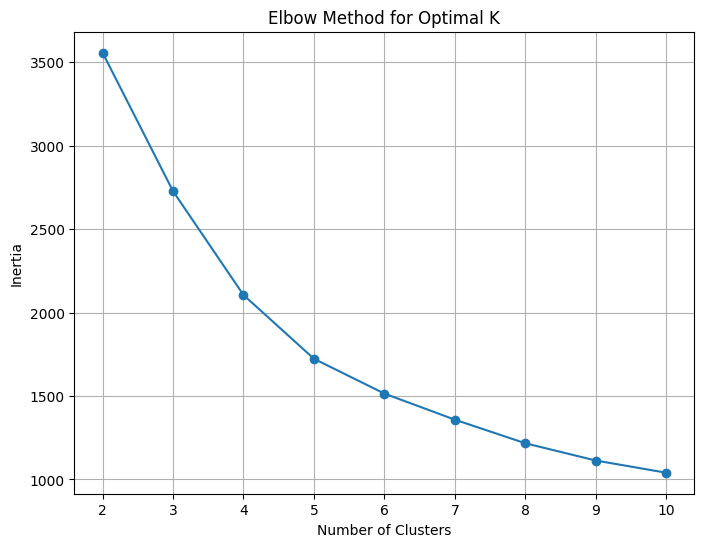

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Normalizing rfm data for plotting
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['recency_log', 'frequency', 'monetaryvalue']])

# Determining optimal number of clusters with Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [11]:
# Choosing 5 as optimal (elbow point)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

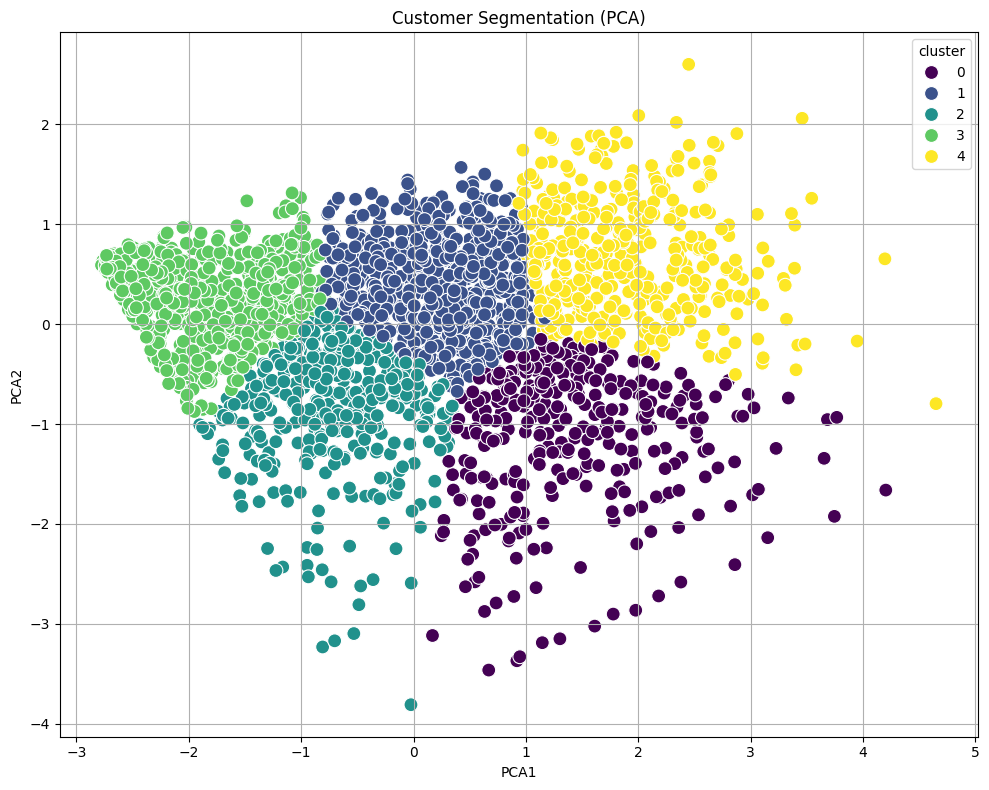

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns

# performing pca for visualization
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = rfm_pca[:, 0] # value
rfm['PCA2'] = rfm_pca[:, 1] # frequency

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=rfm, palette='viridis', s=100)
plt.title('Customer Segmentation (PCA)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
cluster_summary = rfm.groupby('cluster')[['recency_log', 'frequency', 'monetaryvalue']].mean()
print(cluster_summary)

         recency_log  frequency  monetaryvalue
cluster                                       
0           2.215940   8.675595    6550.801488
1           4.615553   7.633648    5763.893443
2           3.733332   4.060606    2754.712955
3           5.578516   2.518750    1797.142859
4           3.964576  11.299087    9633.227397


here we can determine clusters based on recency, frequency and value of customers into 5 groups. it is important to focus on new clients and clients with low frequency and spend

In [16]:
cluster_labels = {
    0: "Loyal High-Value Customers", # High frequency and high monetary value
    1: "Loyal Customers", # Moderate frequency, high monetary value
    2: "Moderate Spend, Low Frequency", # Moderate monetary value, low frequency
    3: "New Customers", # High recency, low frequency, low monetary value
    4: "Loyal High-Value Customers" # High frequency, very high monetary value
}

rfm['cluster_label'] = rfm['cluster'].map(cluster_labels)
print(rfm.head())

                               clientid  recency  frequency  monetaryvalue  \
0  00018c3f-5f99-4f68-a78a-016985759872      170          7        8821.68   
1  000a5e19-8ebf-4d40-924d-d209e2526223       67         12        9986.68   
2  000b1f18-a74f-4e5f-9a94-d809ad51cc03       31          4        2416.13   
3  0037c351-6d1c-4390-87d9-95c7a92c87dd       21          7        7009.02   
4  005e3c87-0c61-4077-8550-25ce1a71de7e       39         11        6371.56   

   avgtransactionvalue  recency_log  avg_transaction_log  cluster      PCA1  \
0              1260.24     5.141664             7.139851        1  0.527259   
1               832.22     4.219508             6.725298        4  1.980129   
2               604.03     3.465736             6.405278        2 -0.678511   
3              1001.29     3.091042             6.910043        0  0.901068   
4               579.23     3.688879             6.363425        4  1.274894   

       PCA2                  cluster_label  
0  1.080279

In [17]:
rfm.to_csv('clustered_rfm.csv', index=False)